# Compare Gamma and N event expected between formulas, generated without scanning, and KDE
# It does not compare physics quantities (observables)

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parameters_dict import physics_parameters
from dark_nus_utils import load_datasets
from plot_utils import set_plot_title, annotated_2d_plot
from exp_analysis_class import exp_analysis, gamma_general

In [ ]:
save_folder = '../fig/2_comparison_parameters/'
save_folder_lin = '../fig/2_comparison_parameters/lin/'
save_folder_log = '../fig/2_comparison_parameters/log/'
!mkdir -p $save_folder_lin
!mkdir -p $save_folder_log

## Use this to load the datasets in the usual way and dump them in pickle files

In [4]:
my_exp_analyses = load_datasets(hierarchies=['heavy'], 
                                D_or_Ms=['majorana'], 
                                fluxes=['FHC'], 
                                timeit=True,
                                direct_load_objects=False, 
                                dump=True)

heavy majorana FHC
loading df base
initialising df base
loading df 0.01, 0.02
initialising df 0.01, 0.02
0.01 0.02 2.953968320041556e-13 majorana
2.8906305838379788e-18
2.8906305838379788e-18

loading df 0.01, 0.2
initialising df 0.01, 0.2
0.01 0.2 2.953968320041556e-13 majorana
2.448638853497268e-22
2.448638853497268e-22

loading df 0.01, 1
initialising df 0.01, 1
0.01 1.0 2.953968320041556e-13 majorana
3.9178221655956297e-25
3.9178221655956297e-25

loading df 0.01, 5
initialising df 0.01, 5
0.01 5.0 2.953968320041556e-13 majorana
6.268515464953006e-28
6.268515464953006e-28

loading df 0.1, 0.2
initialising df 0.1, 0.2
0.1 0.2 2.953968320041556e-13 majorana
2.890630583837979e-17
2.890630583837979e-17

loading df 0.1, 1
initialising df 0.1, 1
0.1 1.0 2.953968320041556e-13 majorana
3.9414863502072606e-20
3.9414863502072606e-20

loading df 0.1, 5
initialising df 0.1, 5
0.1 5.0 2.953968320041556e-13 majorana
6.268515464953008e-23
6.268515464953008e-23

loading df 0.5, 1
initialising df 0.

## Use the function this way to load the datasets from the pickle files

In [ ]:
# my_exp_analyses = load_datasets(timeit=True, direct_load_objects=True)

## Ratio of N events between KDE and generated with no scan on the benchmark grid, for different combinations of smoothing parameters

In [ ]:
#lin smoothing
for smoothing in ([0.001, 0.01], [0.005, 0.05], [0.01, 0.1]):
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
    plt.suptitle(f'N events KDE / generated without scan - linear smoothing = {smoothing[0]} GeV, {smoothing[1]} GeV')
    
    if len(my_exp_analyses) == 1:
        axes = [axes]
    for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
        print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
        n_events_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['actual_weight'].sum())
        n_events_and_err_kde = my_exp_analysis.kde_n_events_benchmark_grid(smoothing=smoothing, distance='lin')
        n_events_kde = n_events_and_err_kde[..., 0]
        n_events_kde_err = n_events_and_err_kde[..., 1]

        plt.sca(ax)
        annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
                          xcenters=my_exp_analysis.m4_scan,
                          ycenters=my_exp_analysis.mz_scan,
                          xlabel =r'$m_4$ [GeV]',
                          ylabel=r'$m_Z$ [GeV]',
                          vmin=0.5,
                          vcenter=1,
                          vmax=1.5,
                          errors_to_annotate=n_events_kde_err/n_events_grid_no_scan
                          )

        set_plot_title(exp_analysis_obj=my_exp_analysis)
    plt.colorbar()
    save_string = f'{save_folder_lin}N_events_smoothing{smoothing[0]}_{smoothing[1]}'
    plt.savefig(save_string + '.png', dpi=250, bbox_inches='tight')
    plt.savefig(save_string + '.pdf', bbox_inches='tight')
    plt.close()

In [ ]:
#log smoothing
for smoothing in ([0.01, 0.01], [0.05, 0.05], [0.1, 0.1], [0.5, 0.5]):
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
    plt.suptitle(f'N events KDE / generated without scan - log smoothing = {smoothing[0]}, {smoothing[1]}')
    
    if len(my_exp_analyses) == 1:
        axes = [axes]
    for my_exp_analysis, ax in zip(my_exp_analyses.values(), axes):
        print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
        n_events_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['actual_weight'].sum())
        n_events_and_err_kde = my_exp_analysis.kde_n_events_benchmark_grid(smoothing=smoothing, distance='log')
        n_events_kde = n_events_and_err_kde[..., 0]
        n_events_kde_err = n_events_and_err_kde[..., 1]

        plt.sca(ax)
        annotated_2d_plot(data=n_events_kde/n_events_grid_no_scan,
                          xcenters=my_exp_analysis.m4_scan,
                          ycenters=my_exp_analysis.mz_scan,
                          xlabel =r'$m_4$ [GeV]',
                          ylabel=r'$m_Z$ [GeV]',
                          vmin=0.5,
                          vcenter=1,
                          vmax=1.5,
                          errors_to_annotate=n_events_kde_err/n_events_grid_no_scan
                          )

        set_plot_title(exp_analysis_obj=my_exp_analysis, smoothing_pars=smoothing)
    plt.colorbar()
    save_string = f'{save_folder_log}N_events_smoothing{smoothing[0]}_{smoothing[1]}'
    plt.savefig(save_string + '.png', dpi=250, bbox_inches='tight')
    plt.savefig(save_string + '.pdf', bbox_inches='tight')
    plt.close()

## N event profile, fixing KDE smoothing, in slices at fixed m4

In [ ]:
bin_width_m4 = 0.005
bins_mz = 20

In [ ]:
#log 
general_smoothing = [0.1, 0.1]
for my_exp_analysis in my_exp_analyses.values():
    print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
    n_events_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['actual_weight'].sum())
    this_mz_scan = np.asarray(my_exp_analysis.mz_scan)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analysis.m4_scan), figsize=(len(my_exp_analysis.m4_scan)*6, 5))
    set_plot_title(exp_analysis_obj=my_exp_analysis, smoothing_pars=general_smoothing, suptitle=True)
    for i, (m4, ax) in enumerate(zip(my_exp_analysis.m4_scan, axes)):
        if my_exp_analysis.hierarchy == 'heavy':
            mz_edges = np.linspace(m4, my_exp_analysis.mz_limits[1], bins_mz+1)
        else:
            mz_edges = np.linspace(my_exp_analysis.mz_limits[0], m4, bins_mz+1)
        bin_size_2d = (mz_edges[1] - mz_edges[0]) * bin_width_m4

        kde_weights = my_exp_analysis.kde_on_a_grid(my_exp_analysis.df_base,
                                                    m4, 
                                                    mz_edges, 
                                                    distance='log',
                                                    smoothing=general_smoothing)

        n_events_kde = kde_weights.sum(axis=0)[0]
        n_events_err_kde = np.sqrt((kde_weights**2).sum(axis=0))[0]
        non_zero_mask = (n_events_no_scan[i] != 0)
        ax.plot(this_mz_scan[non_zero_mask],
                 n_events_no_scan[i][non_zero_mask],
                 'o',
                 label='Generated without scanning')
        
        ax.plot(mz_edges,
                 n_events_kde,
                 label=f'kde 2d')
                 
        ax.fill_between(mz_edges, 
                         n_events_kde - n_events_err_kde, 
                         n_events_kde + n_events_err_kde, 
                         alpha=0.25, 
                         color=ax.lines[-1].get_color(), 
                         interpolate=True)

        this_mask = (my_exp_analysis.m4_values > (m4-bin_width_m4/2)) & (my_exp_analysis.m4_values < (m4+bin_width_m4/2))        
        ax.hist(my_exp_analysis.mz_values[this_mask], bins=mz_edges,
                    weights=my_exp_analysis.actual_weight_values[this_mask]/bin_size_2d,
                    histtype='step', label='histogram')

        ax.legend(frameon=False, loc='upper right')
        ax.set_xlabel(r"$M_Z'$ [GeV]")
        ax.set_ylabel('Expected number of entries')
        ax.set_yscale('log')
        ax.set_title(f'm4 = {m4} GeV')
    save_string = f'{save_folder}N_events_profile_{my_exp_analysis.hierarchy}_{my_exp_analysis.D_or_M}'
    plt.savefig(save_string + '.png', dpi=250, bbox_inches='tight')
    plt.savefig(save_string + '.pdf', bbox_inches='tight')
    plt.close()

## Effective sample size

In [ ]:
from scipy.stats import binned_statistic, binned_statistic_2d
from matplotlib.colors import LogNorm

def effective_sample_size(weights):
    return np.sum(weights)**2/np.sum(np.power(weights, 2))

def ratio_weighted_unweighted(weights):
    return np.sum(weights)/len(weights)

def ess_1d_plots(my_exp_analysis, bins=50):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    weight_values = my_exp_analysis.df_base['weight']
    plt.suptitle(f"{my_exp_analysis.hierarchy} {my_exp_analysis.D_or_M}")
    
    for var, label, ax in zip(['m4', 'mzprime'], [r'$m_4$ [GeV]', r'$m_Z$ [GeV]'], axes):
        var_values = my_exp_analysis.df_base[var]
        ax[0].hist(var_values, 
             density=True, 
             label='unweighted',
             histtype='step',
             bins=bins)
        ax[0].hist(var_values, 
                 weights=weight_values, 
                 density=True, 
                 label='weighted',
                 histtype='step',
                 bins=bins)
        ax[0].legend(frameon=False, loc='upper left')
        ax[0].set_title('Number of events')
        ax[0].set_xlabel(label)
        ax[0].set_yscale('log')
        ax[0].set_xscale('log')
        
        this_ess = binned_statistic(var_values, weight_values, 
                     statistic=effective_sample_size,
                     bins=bins)
        bin_centers = (this_ess[1][:-1] + this_ess[1][1:])/2
        ax[1].plot(bin_centers, this_ess[0])
        ax[1].set_xlabel(label)
        ax[1].set_title(f'effective sample size\noverall ESS = {effective_sample_size(weight_values):.2g}')
        ax[1].set_ylabel('effective sample size')
        
        this_ratio_wei_unwei = binned_statistic(var_values, weight_values,
                         statistic=ratio_weighted_unweighted,
                         bins=bins)
        bin_centers = (this_ratio_wei_unwei[1][:-1] + this_ratio_wei_unwei[1][1:])/2
        ax[2].plot(bin_centers, this_ratio_wei_unwei[0]*len(weight_values)/weight_values.sum())
        ax[2].set_xlabel(label)
        ax[2].set_ylabel('weighed/unweighed')
        ax[2].set_title('ratio weighed/unweighed')
    save_string = f'{save_folder}ess1d_{my_exp_analysis.hierarchy}_{my_exp_analysis.D_or_M}'
    plt.savefig(save_string + '.png', dpi=250, bbox_inches='tight')    
    plt.savefig(save_string + '.pdf', bbox_inches='tight')
    plt.close()
    
def ess_2d_plots(my_exp_analysis, this_bins=[40, 40], xlabel=r'$m_4$ [GeV]', ylabel=r'$m_Z$ [GeV]'):
    m4_values = my_exp_analysis.m4_values
    mz_values = my_exp_analysis.mz_values
    weight_values = my_exp_analysis.df_base['weight']
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.suptitle(f"{my_exp_analysis.hierarchy} {my_exp_analysis.D_or_M}")
    
    this_ess = binned_statistic_2d(m4_values, mz_values, weight_values, 
                     statistic=effective_sample_size,
                     bins=this_bins)
    PCM = axes[0].pcolormesh(this_ess[1], this_ess[2], this_ess[0].T)
    plt.colorbar(PCM, ax=axes[0])
    axes[0].set_title('Effective sample size')
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)

    this_ratio_wei_unwei = binned_statistic_2d(m4_values, mz_values, weight_values, 
                     statistic=ratio_weighted_unweighted,
                     bins=this_bins)
    PCM = axes[1].pcolormesh(this_ratio_wei_unwei[1], 
                       this_ratio_wei_unwei[2], 
                       this_ratio_wei_unwei[0].T*len(weight_values)/weight_values.sum(), 
                       norm=LogNorm())
    plt.colorbar(PCM, ax=axes[1])
    axes[1].set_title('ratio weighed/unweighed')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)

    plt.tight_layout()
    save_string = f'{save_folder}ess2d_{my_exp_analysis.hierarchy}_{my_exp_analysis.D_or_M}'
    plt.savefig(save_string + '.png', dpi=250, bbox_inches='tight')    
    plt.savefig(save_string + '.pdf', bbox_inches='tight')
    plt.close()

In [ ]:
for my_exp_analysis in my_exp_analyses.values():
    print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
    ess_1d_plots(my_exp_analysis)
    ess_2d_plots(my_exp_analysis)

## Ratio of $\Gamma$ between KDE and generated with no scan on the benchmark grid - deprecated since we are using the formula in both KDE and generated without scanning, but in principle, if we were to integrate the $\Gamma$ with VEGAS, it would be a good check

heavy majorana
m4s [[0.01 0.01 0.01 0.01]
 [0.   0.1  0.1  0.1 ]
 [0.   0.   0.5  0.5 ]]
mzs [[0.02 0.2  1.   5.  ]
 [0.   0.2  1.   5.  ]
 [0.   0.   1.   5.  ]]
Vmu4_alpha_epsilon2 [[2.95396832e-13 2.95396832e-13 2.95396832e-13 2.95396832e-13]
 [0.00000000e+00 2.95396832e-13 2.95396832e-13 2.95396832e-13]
 [0.00000000e+00 0.00000000e+00 2.95396832e-13 2.95396832e-13]]
D_or_M [['majorana' 'majorana' 'majorana' 'majorana']
 ['0' 'majorana' 'majorana' 'majorana']
 ['0' '0' 'majorana' 'majorana']]
gamma_formula [[2.89063052e-18 2.44863821e-22 3.91782173e-25 6.26851360e-28]
 [0.00000000e+00 2.89063063e-17 3.94148785e-20 6.26851500e-23]
 [0.00000000e+00 0.00000000e+00 1.44531529e-16 1.97074389e-19]]
gamma_grid_no_scan [[2.89063063e-18 2.44863889e-22 3.91782222e-25 6.26851534e-28]
 [0.00000000e+00 2.89063063e-17 3.94148622e-20 6.26851531e-23]
 [0.00000000e+00 0.00000000e+00 1.44531535e-16 1.97074320e-19]]
gamma_formula/gamma_grid_no_scan [[0.99999996 0.99999972 0.99999987 0.99999972]
 [    

<ipython-input-59-c56d306f0cd7>:24: RuntimeWarning: invalid value encountered in true_divide
  print('gamma_formula/gamma_grid_no_scan', gamma_formula/gamma_grid_no_scan)
<ipython-input-59-c56d306f0cd7>:26: RuntimeWarning: invalid value encountered in true_divide
  annotated_2d_plot(data=gamma_formula/gamma_grid_no_scan,


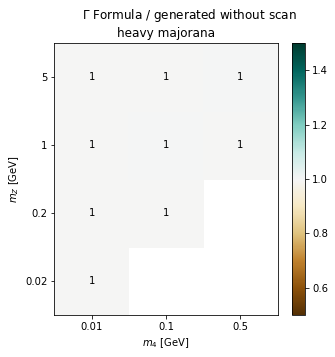

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=len(my_exp_analyses), figsize=(len(my_exp_analyses)*5, 5))
plt.suptitle(r'$\Gamma$ Formula / generated without scan')

for i, my_exp_analysis in enumerate(my_exp_analyses.values()):
    if len(my_exp_analyses) == 1:
        ax = axes
    else:
        ax = axes[i]
    print(my_exp_analysis.hierarchy, my_exp_analysis.D_or_M)
    gamma_grid_no_scan = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['total_decay_rate'][0])
    gamma_formula = my_exp_analysis.no_scan_benchmark_grid(lambda x: gamma_general(x['m4'][0], x['mzprime'][0], 
                                                                                   my_exp_analysis.Vmu4_alpha_epsilon2, 
                                                                                   my_exp_analysis.D_or_M))
    m4s = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['m4'][0])
    mzs = my_exp_analysis.no_scan_benchmark_grid(lambda x: x['mzprime'][0])
    Vmu4_alpha_epsilon2 = my_exp_analysis.no_scan_benchmark_grid(lambda x: my_exp_analysis.Vmu4_alpha_epsilon2)
    D_or_M = my_exp_analysis.no_scan_benchmark_grid(lambda x: my_exp_analysis.D_or_M)
    print('m4s', m4s)
    print('mzs', mzs)
    print('Vmu4_alpha_epsilon2', Vmu4_alpha_epsilon2)
    print('D_or_M', D_or_M)
    print('gamma_formula', gamma_formula)
    print('gamma_grid_no_scan', gamma_grid_no_scan)
    print('gamma_formula/gamma_grid_no_scan', gamma_formula/gamma_grid_no_scan)
    plt.sca(ax)
    annotated_2d_plot(data=gamma_formula/gamma_grid_no_scan,
                      xcenters=my_exp_analysis.m4_scan,
                      ycenters=my_exp_analysis.mz_scan,
                      xlabel =r'$m_4$ [GeV]',
                      ylabel=r'$m_Z$ [GeV]',
                      vmin=0.5,
                      vmax=1.5,
                      vcenter=1,
                      )
    
    set_plot_title(exp_analysis_obj=my_exp_analysis)

plt.colorbar()
plt.savefig('../fig/2_comparison_parameters/Gamma.pdf', bbox_inches='tight')

In [60]:
m4s < mzs

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True]])

In [61]:
gamma_heavy(m4s, mzs, Vmu4_alpha_epsilon2, D_or_M)

/n/home00/nfoppiani/projects/dark_nus/exp_analysis/ctau_utils.py:21: RuntimeWarning: invalid value encountered in true_divide
  r = ((m4/mz)**2)


array([[2.89063052e-18, 2.44863843e-22, 3.91782173e-25, 6.26851476e-28],
       [           nan, 2.89063063e-17, 3.94148785e-20, 6.26851593e-23],
       [           nan,            nan, 1.44531529e-16, 1.97074318e-19]])

In [56]:
gamma_light(m4s, mzs, Vmu4_alpha_epsilon2, D_or_M)

/n/home00/nfoppiani/projects/dark_nus/exp_analysis/ctau_utils.py:43: RuntimeWarning: invalid value encountered in true_divide
  print(type(m4), type(mz), type(gamma))
/n/home00/nfoppiani/projects/dark_nus/exp_analysis/ctau_utils.py:52: RuntimeWarning: invalid value encountered in sqrt
  gamma = (2*np.pi*2*np.sqrt(-4*(m_ell*m_ell) + mz*mz)*(5*(m_ell*m_ell) + 2*(mz*mz))*np.pi)/(24.*(mz*mz)*(np.pi*np.pi))


array([[9.97286696e-17, 1.56954719e-11, 4.92254301e-08, 1.53851605e-04],
       [           nan, 9.96967592e-15, 4.84943420e-11, 1.53760199e-07],
       [           nan,            nan, 2.49241110e-13, 1.21235845e-09]])

In [65]:
m4s

array([[0.01, 0.01, 0.01, 0.01],
       [0.  , 0.1 , 0.1 , 0.1 ],
       [0.  , 0.  , 0.5 , 0.5 ]])

In [64]:
gamma_N_light(mzs, m4s, Vmu4_alpha_epsilon2, D_or_M)

array([[4.98482143e-15, 5.90782658e-12, 7.38492091e-10, 9.23115141e-08],
       [           nan, 4.98482161e-14, 7.38271987e-12, 9.23114630e-10],
       [           nan,            nan, 2.49241077e-13, 3.69136005e-11]])

In [50]:
gamma_N_light(1, 0.1, Vmu4_alpha_epsilon2[0][0], D_or_M[0][0])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
1 0.1 24.992549999999994


array(7.38272009e-12)

In [31]:
gamma_heavy(m4s, mzs, Vmu4_alpha_epsilon2, D_or_M)

(3, 4) (3, 4) (3, 4)


array([[2.89063052e-18, 2.44863843e-22, 3.91782173e-25, 6.26851476e-28],
       [           nan, 2.89063063e-17, 3.94148785e-20, 6.26851593e-23],
       [           nan,            nan, 1.44531529e-16, 1.97074318e-19]])

In [8]:
my_exp_analysis.D_or_M

'majorana'

In [14]:
gamma_general(np.asarray([0.5]), np.asarray([5]), my_exp_analysis.Vmu4_alpha_epsilon2, my_exp_analysis.D_or_M)

array([1.97074318e-19])

In [45]:
from ctau_utils import gamma_heavy, gamma_general, gamma_light, gamma_N_light

In [21]:
gamma_general(0.5, 5.0, 2.9e-13, 'majorana')

array(1.93473815e-19)